## Descriptive Statistics

This notebook provides code to replicate the descriptive statistics tables and figures from the report.

In [23]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
# Load csv files
train = pd.read_csv('data/paths/train.csv', usecols=['path', 'channel', 'height', 'width', 'label'])
test  = pd.read_csv('data/paths/test.csv', usecols=['path', 'channel', 'height', 'width', 'label'])
val   = pd.read_csv('data/paths/val.csv', usecols=['path', 'channel', 'height', 'width', 'label'])

# Create 'type' variable
train['type'] = 'train'
test['type'] =  'test'
val['type'] = 'val'

# Create 'size' variable
train['size'] = train['height'] * train['width']
test['size'] = test['height'] * test['width']
val['size'] = val['height'] * val['width']

# Combine datasets
data = pd.concat([train, test, val], ignore_index=True, axis=0)
data = data[['type', 'path', 'channel', 'height', 'width', 'size', 'label']]

In [25]:
# Table with descriptive statistics
pd.set_option('display.float_format', lambda x: '%.0f' % x)
data[["channel", "height","width", "size"]].describe(percentiles=[.25, 0.5, 0.75]).T

,count,mean,std,min,25%,50%,75%,max
channel,5856,1,0,1,1,1,1,3
height,5856,971,383,127,688,888,1187,2713
width,5856,1328,364,384,1056,1281,1560,2916
size,5856,1418909,970443,48768,727888,1136928,1852074,7532028


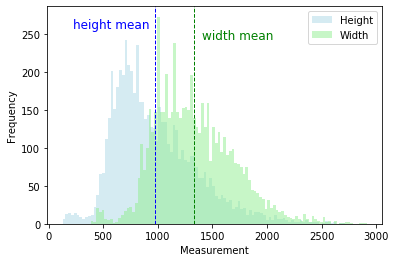

In [26]:
# Distribution of heights and widths
height_mean = data['height'].mean()
width_mean = data['width'].mean()
height_sd = data['height'].std()
width_sd = data['width'].std()

height = data.loc[:, 'height']
width = data.loc[:, 'width']

plt.hist(height, bins=100, color='lightblue', alpha=0.5, label='Height')
plt.hist(width, bins=100, color='lightgreen', alpha=0.5, label='Width')
plt.axvline(height_mean, color='blue', linestyle='dashed', linewidth=1)
plt.text(height_mean-400, plt.ylim()[1]*0.9, 'height mean', color='blue', fontsize=12, ha='center')
plt.axvline(width_mean, color='green', linestyle='dashed', linewidth=1)
plt.text(width_mean+400, plt.ylim()[1]*0.85, 'width mean', color='green', fontsize=12, ha='center')
plt.xlabel('Measurement')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [27]:
# Table with label count
data.groupby(["label"])["type"].count().reset_index(name="count")

,label,count
0,NORMAL,1583
1,PNEUMONIA,4273
